In [15]:
from dataloader_classes import Lung_Train_Dataset, Lung_Test_Dataset, Lung_Val_Dataset, dataset_bar
from small_functions import *
from threeclasses_classifier import *
from binaryclassifier import train_binary_classifier_model1, train_binary_classifier_model2

''' Uncomment this part of code if you make changes in the imported modules >>>>'''
# reload modules so that the changes take effect without restarting the jupyter notebook kernel
# import importlib
# import sys
# importlib.reload(sys.modules['dataloader_classes'])
# importlib.reload(sys.modules['small_functions'])
# importlib.reload(sys.modules['threeclasses_classifier'])
''' <<< Uncomment this part of code if you make changes in the imported modules'''

# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ld_train = Lung_Train_Dataset()
ld_train.describe()
print(len(ld_train))
im, class_oh = ld_train[5215]
print(im.shape)
print(im)
print(class_oh)

This is the training dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - train_normal, in folder ./dataset/train/normal/: 1341 images.
 - train_infected(non_covid), in folder ./dataset/train/infected/non-covid/: 2530 images.
 - train_infected(covid), in folder ./dataset/train/infected/covid/: 1345 images.

5216
torch.Size([1, 150, 150])
tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 0., 1.])


In [3]:
ld_test = Lung_Test_Dataset()
ld_test.describe()
print(len(ld_test))
im, class_oh = ld_test[476]
print(im.shape)
print(im)
print(class_oh)

This is the test dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 615 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - test_normal, in folder ./dataset/test/normal/: 234 images.
 - test_infected(non_covid), in folder ./dataset/test/infected/non-covid/: 242 images.
 - test_infected(covid), in folder ./dataset/test/infected/covid/: 139 images.

615
torch.Size([1, 150, 150])
tensor([[[0.2588, 0.3725, 0.4314,  ..., 0.1176, 0.1255, 0.1333],
         [0.3686, 0.4196, 0.4549,  ..., 0.1137, 0.1216, 0.1255],
         [0.4392, 0.4275, 0.4510,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.1647, 0.1765, 0.1412,  ..., 0.1569, 0.1569, 0.1569],
         [0.1647, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569],
         [0.1608, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569]]])
tensor([0., 0., 1.])


In [4]:
ld_val = Lung_Val_Dataset()
ld_val.describe()
print(len(ld_val))
im, class_oh = ld_val[15]
print(im.shape)
print(im)
print(class_oh)

This is the validation dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 25 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - val_normal, in folder ./dataset/val/normal/: 8 images.
 - val_infected(non_covid), in folder ./dataset/val/infected/non-covid: 8 images.
 - val_infected(covid), in folder ./dataset/val/infected/covid: 9 images.

25
torch.Size([1, 150, 150])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0157],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 1., 0.])


In [5]:
bs_val = 64

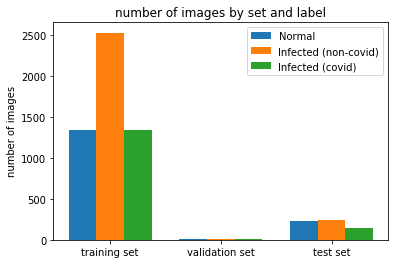

In [6]:
# data visualization
dataset_bar(ld_train,ld_val,ld_test)

In [7]:
# creating dataloader object
gen = torch.Generator()
train_loader = DataLoader(ld_train, batch_size = bs_val, shuffle = True, generator=gen)
print(train_loader)
test_loader = DataLoader(ld_test, batch_size = bs_val, shuffle = True, generator=gen)
print(test_loader)
val_loader = DataLoader(ld_val, batch_size = bs_val, shuffle = True,generator=gen)
print(val_loader)

In [8]:
# Typical mini-batch for loop on dataloader (train)
for k, v in enumerate(train_loader):
    print("-----")
    print(k)
    print(v[0])
    print(v[1])
    # Forced stop
    break
    #assert False, "Forced stop after one iteration of the for loop"

-----
0
tensor([[[[0.2392, 0.3255, 0.1686,  ..., 0.0549, 0.0549, 0.0510],
          [0.2196, 0.3137, 0.1804,  ..., 0.0627, 0.0627, 0.0588],
          [0.2157, 0.3137, 0.2235,  ..., 0.0549, 0.0510, 0.0471],
          ...,
          [0.0118, 0.0078, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0078]]],


        [[[0.2510, 0.2549, 0.2588,  ..., 0.2157, 0.2000, 0.1843],
          [0.2510, 0.2549, 0.2627,  ..., 0.2196, 0.2078, 0.1961],
          [0.2549, 0.2588, 0.2627,  ..., 0.2196, 0.2000, 0.1882],
          ...,
          [0.0353, 0.0275, 0.0275,  ..., 0.0196, 0.0235, 0.0157],
          [0.0353, 0.0275, 0.0275,  ..., 0.0196, 0.0196, 0.0157],
          [0.0353, 0.0275, 0.0275,  ..., 0.0196, 0.0196, 0.0157]]],


        [[[0.0275, 0.0275, 0.0275,  ..., 0.2314, 0.2157, 0.1804],
          [0.0275, 0.0314, 0.0353,  ..., 0.2314, 0.2157, 0.1765],
          [0.0431, 0.0471, 0.0

Testing of the dataloader

Train 3-classes clasifier

In [9]:
# Define loss function for training 
loss_function=nn.NLLLoss()
# Initialise model 
model=Classifier()
# Train model
model=train_model(model,train_loader,test_loader,2,loss_function)

[tensor(0.2656)]
11 ----------------------
[tensor(0.2656), tensor(0.2656)]
12 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188)]
13 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969)]
14 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969), tensor(0.5000)]
15 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969), tensor(0.5000), tensor(0.3438)]
16 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969), tensor(0.5000), tensor(0.3438), tensor(0.4688)]
17 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969), tensor(0.5000), tensor(0.3438), tensor(0.4688), tensor(0.2656)]
18 ----------------------
[tensor(0.2656), tensor(0.2656), tensor(0.2188), tensor(0.2969), tensor(0.5000), tensor(0.3438), tensor(0.4688), tensor(0.2656), tensor(0.3438)]
19 ----------------------
[tensor(0.2656), tensor(0.2656), tens

In [11]:
# Save trained model to model folder
model_idx=2
model_name='three_classes'+str(model_idx)
path='./model/'+model_name+'.pt'
save_model(model,path)


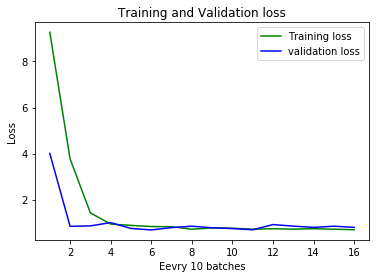

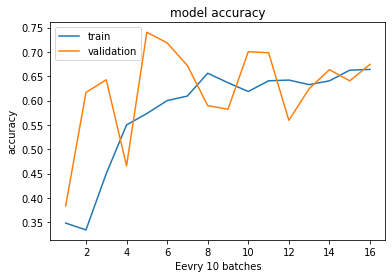

In [12]:
# Plot learning curve and save to folder learningCurve
loss_fig,acc_fig=learning_curve(model.history)
loss_fig.savefig('./learningCurve/loss'+str(model_idx)+'.jpg')
acc_fig.savefig('./learningCurve/acc'+str(model_idx)+'.jpg')

In [13]:
# Load model
test_model=load_model('./model/three_classes'+str(model_idx)+'.pt')
test_model

Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=165888, out_features=3, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax(dim=1)
)

In [16]:
predicted_label,targeted_labels=predict(test_model,val_loader)
calculate_accuracy(predicted_label[0],targeted_labels[0])

tensor(0.6800)

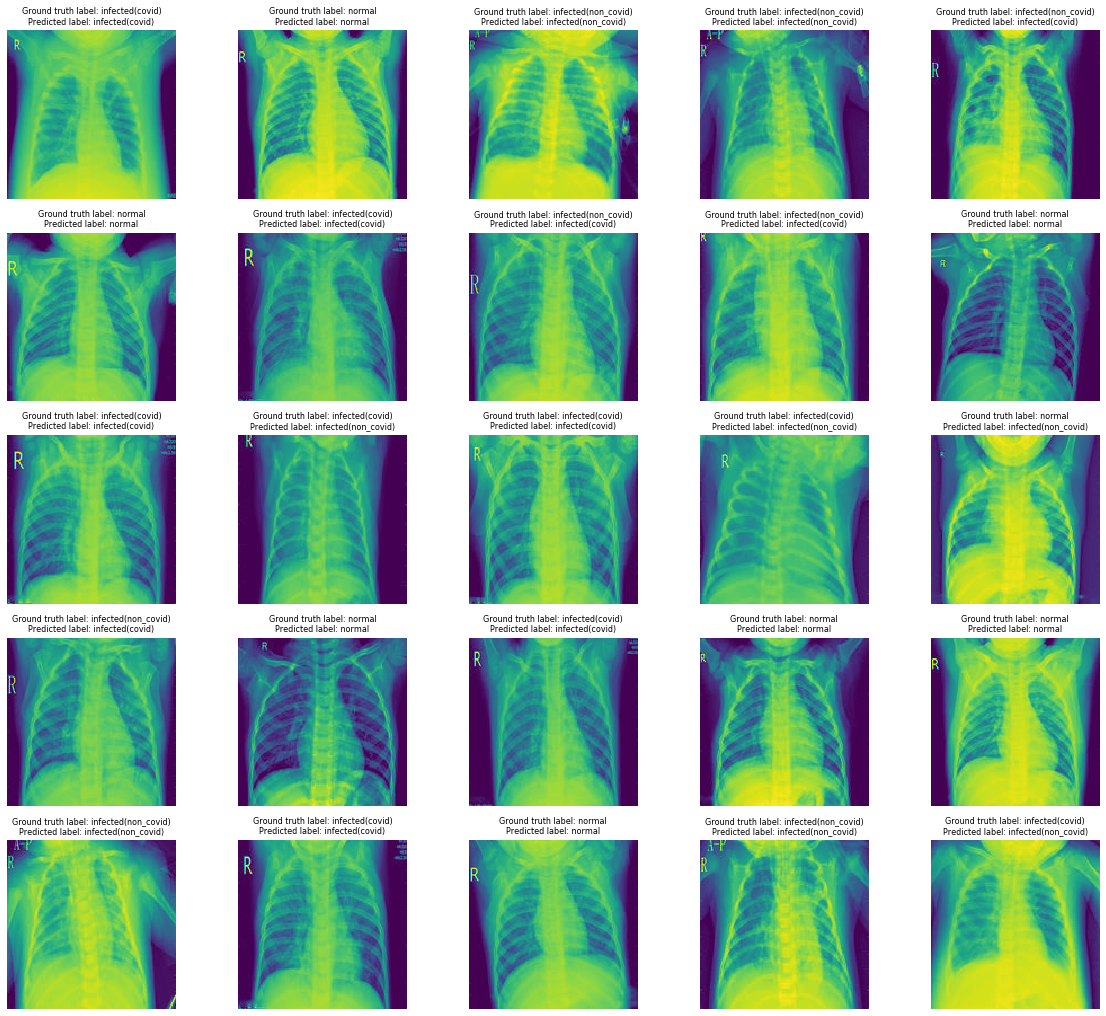

In [17]:
show_val_images(test_model,val_loader)

In [18]:
conf_df=calculate_confusion_df(test_model,test_loader)
# Recall = TP / (TP+FN)
conf_matrix=conf_df.to_numpy()
conf_df
# conf_matrix
# recall=conf_matrix[0,0]+[]

,Predicted Normal,Predicted Infected (non_covid),Predicted Infected (covid)
Actual Normal,80,65,89
Actual Infected (non_covid),2,238,2
Actual Infected (covid),0,48,91


In [19]:
covid2others=np.sum(conf_matrix[2,:-1])/np.sum(conf_matrix[2,:])
covid2others
# print(conf_matrix[2,:-1])

0.34532374100719426

Seeding with 2809
checking if data is shuffled but same tensor([[[0.1725, 0.1686, 0.1490,  ..., 0.1373, 0.1804, 0.2314],
         [0.1255, 0.1373, 0.1373,  ..., 0.1255, 0.1686, 0.2157],
         [0.1216, 0.0980, 0.0941,  ..., 0.1098, 0.1294, 0.1529],
         ...,
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1059, 0.1059,  ..., 0.1098, 0.1098, 0.1098]]]) tensor([0., 1., 0.]) 
Epoch: 0/1 @ 1616270432.8097348  
 Training Loss: 2.515 -  Training Accuracy: 0.527 -  Validation Loss: 2.602 -  Validation Accuracy: 0.617
Epoch: 0/1 @ 1616270445.1787324  
 Training Loss: 1.107 -  Training Accuracy: 0.602 -  Validation Loss: 0.496 -  Validation Accuracy: 0.783
Epoch: 0/1 @ 1616270456.6057398  
 Training Loss: 0.443 -  Training Accuracy: 0.719 -  Validation Loss: 0.449 -  Validation Accuracy: 0.771
Epoch: 0/1 @ 1616270468.2027338  
 Training Loss: 0.394 -  Training Accuracy: 0.702 -  Validatio

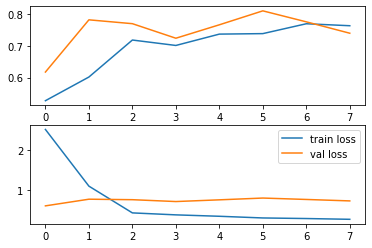

Training finished! 
 Run time: 1.699 mins
Seeding with 2809
checking if data is shuffled but same tensor([[[0.1725, 0.1686, 0.1490,  ..., 0.1373, 0.1804, 0.2314],
         [0.1255, 0.1373, 0.1373,  ..., 0.1255, 0.1686, 0.2157],
         [0.1216, 0.0980, 0.0941,  ..., 0.1098, 0.1294, 0.1529],
         ...,
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1020, 0.1059, 0.1098,  ..., 0.1098, 0.1098, 0.1098],
         [0.1098, 0.1059, 0.1059,  ..., 0.1098, 0.1098, 0.1098]]]) tensor([0., 1., 0.]) 
Epoch: 0/1 @ 1616270568.6747487  
 Training Loss: 5.052 -  Training Accuracy: 0.616 -  Validation Loss: 0.836 -  Validation Accuracy: 0.653
Epoch: 0/1 @ 1616270622.087732  
 Training Loss: 2.397 -  Training Accuracy: 0.668 -  Validation Loss: 0.663 -  Validation Accuracy: 0.653
Epoch: 0/1 @ 1616270673.9072673  
 Training Loss: 1.806 -  Training Accuracy: 0.707 -  Validation Loss: 1.037 -  Validation Accuracy: 0.632
Epoch: 0/1 @ 1616270721.4912715  
 Training Loss: 1.881

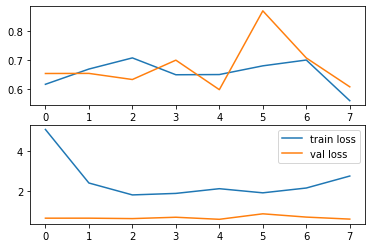

Training finished! 
 Run time: 6.307 mins


In [8]:
# binary classifier architectire
loss_function=nn.NLLLoss()
model1, predlist = train_binary_classifier_model1(train_loader,1,loss_function,gen,test_loader)
model = train_binary_classifier_model2(train_loader,1,loss_function,predlist,gen,test_loader)
